In [1]:
#Basic
import numpy as np
import cv2
import scipy
import os
from keras.utils import np_utils
import random

#Pre-processing
import glob
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from time import time

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Visualizers
%matplotlib inline
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix


Using TensorFlow backend.
C:\Users\Oswaldo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Oswaldo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Oswaldo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Oswaldo\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#import os
#os.chdir("/content/gdrive/My Drive/Colab Notebooks/Final_Project")

In [3]:
BASE_DIR = 'C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/'

In [4]:
imagePatches = glob.glob(BASE_DIR +'dataset/Train/Class1/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1\COVID-19 (1).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1\COVID-19 (10).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1\COVID-19 (100).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1\COVID-19 (101).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1\COVID-19 (102).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1\COVID-19 (103).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1\COVID-19 (104).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1\COVID-19 (105).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1\COVID-19 (106).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1\COVID-19 (107).png


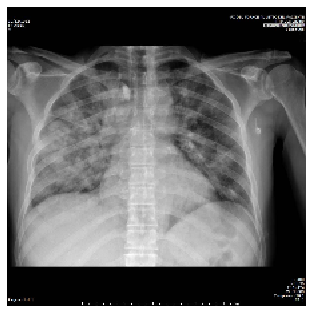

In [5]:
image_name = "C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19(144).png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (224,224))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)

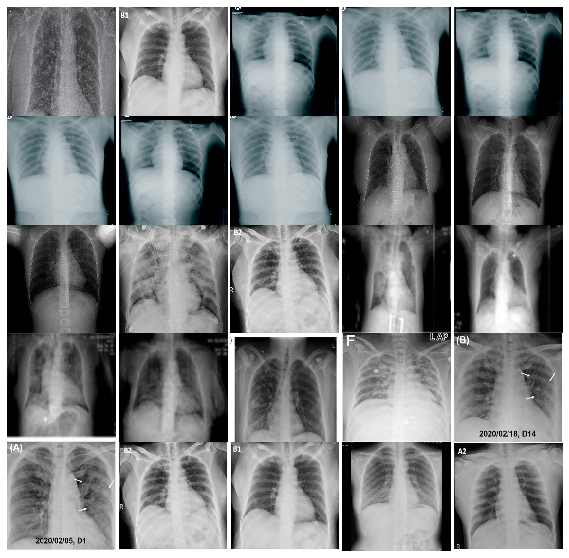

In [6]:
# Plot Multiple Images
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

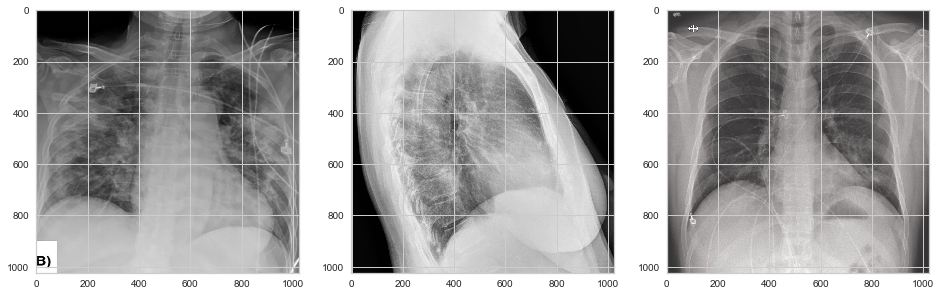

In [7]:
def randomImages(a):
    r = random.sample(a, 4)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
randomImages(imagePatches)

In [8]:
imagePatches2 = glob.glob(BASE_DIR +'dataset/Train/Class2/*.png', recursive=True)
for filename in imagePatches2[0:10]:
    print(filename)

C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2\NORMAL (1).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2\NORMAL (10).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2\NORMAL (100).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2\NORMAL (1000).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2\NORMAL (1001).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2\NORMAL (1002).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2\NORMAL (1003).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2\NORMAL (1004).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2\NORMAL (1005).png
C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2\NORMAL (1006).png


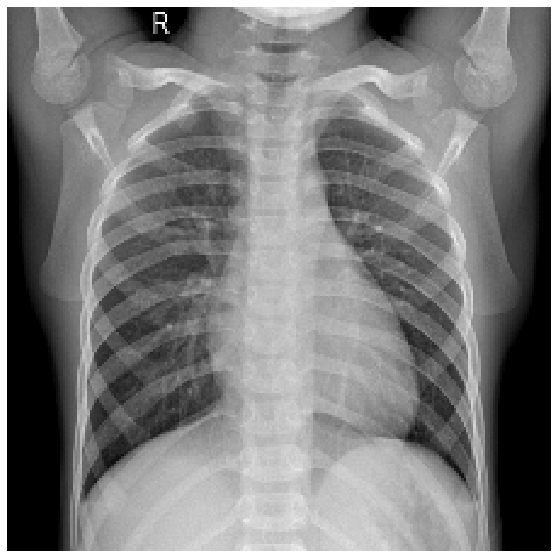

In [9]:
image_name2 = "C:/Users/Oswaldo/Google Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (132).png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name2)
    image = cv2.resize(image, (224,224))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name2)

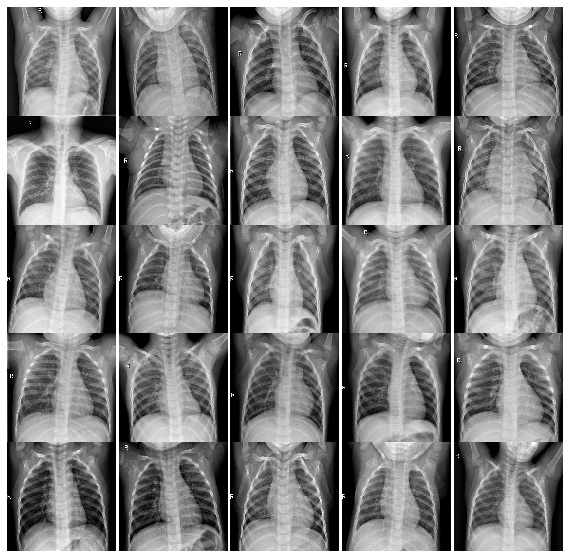

In [10]:
# Plot Multiple Images
bunchOfImages2 = imagePatches2
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages2[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

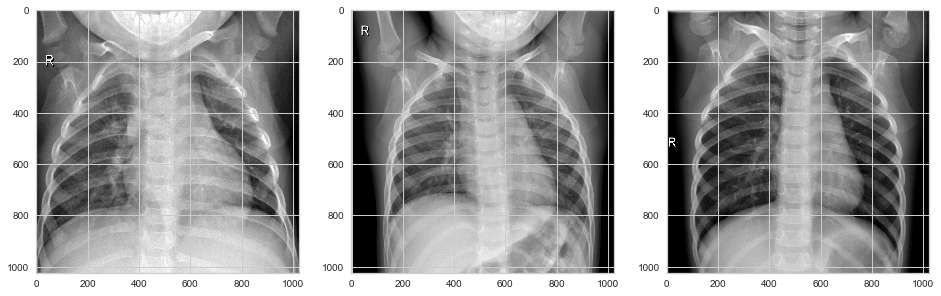

In [11]:
def randomImages(a):
    r = random.sample(a, 4)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
randomImages(imagePatches2)

In [12]:
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []

    for rayx_type in os.listdir(folder):
        if not rayx_type.startswith('Class3'):
            if rayx_type in ['Class1']:
                label = '0'
            else:
                if rayx_type in ['Class2']:
                    label = '1'
            for image_filename in os.listdir(folder + rayx_type):
                img_file = cv2.imread(folder + rayx_type + '/' + image_filename, 0)
                if img_file is not None:
                    # Downsample the image to 224, 224, 3
                    image = cv2.resize(img_file, (224, 224))
                    img_arr = np.asarray(image)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [13]:
classes = ["0", "1"]

In [14]:
X_train, y_train = get_data(BASE_DIR + 'dataset/Train/')
X_test, y_test = get_data(BASE_DIR + 'dataset/Test/')

In [15]:
#Covert 3D data arrays to 2D

nsamples, nx, ny = X_train.shape
nsamples2, nx2, ny2 = X_test.shape
X_train_new = X_train.reshape((nsamples,nx*ny))
X_test = X_test.reshape((nsamples2,nx2*ny2))

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [16]:
# select classifiers 
classifiers=[
KNeighborsClassifier(),
LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg'),
DecisionTreeClassifier(random_state=0),
RandomForestClassifier(),
SVC(),
MLPClassifier()]

In [17]:
#Write function for class-centric metrics
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train_new, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)

In [18]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train_new, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        score = accuracy_score(y_test, y_pred)
        print('accuracy_score: {0:.3f}'.format(score))

    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

C:\Users\Oswaldo\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


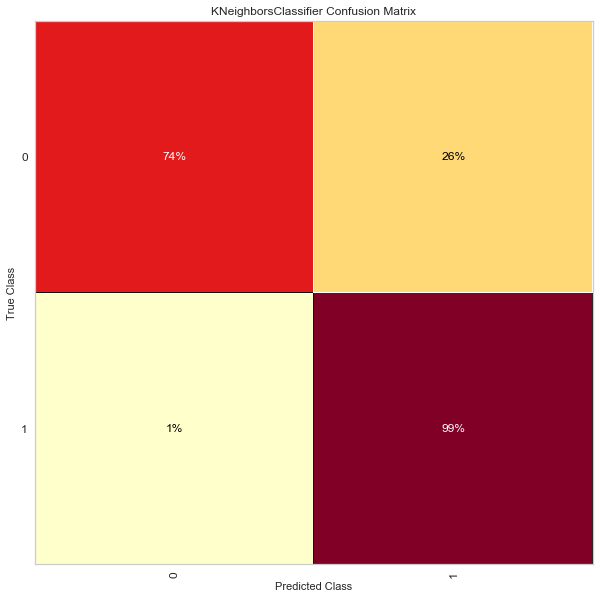

C:\Users\Oswaldo\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


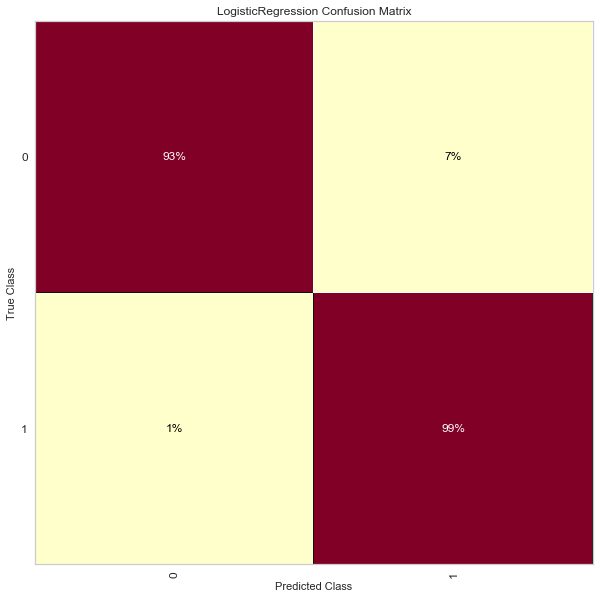

C:\Users\Oswaldo\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


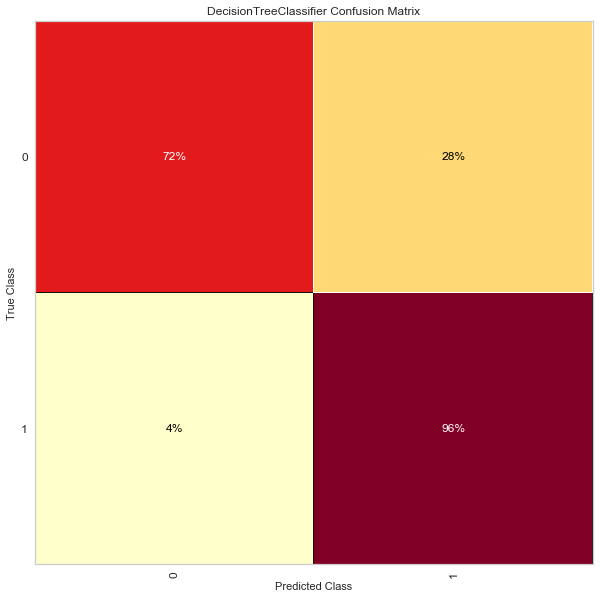

C:\Users\Oswaldo\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


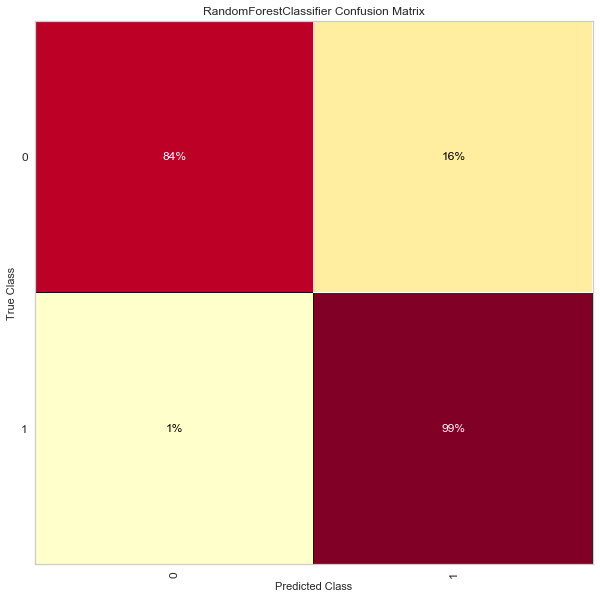

C:\Users\Oswaldo\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


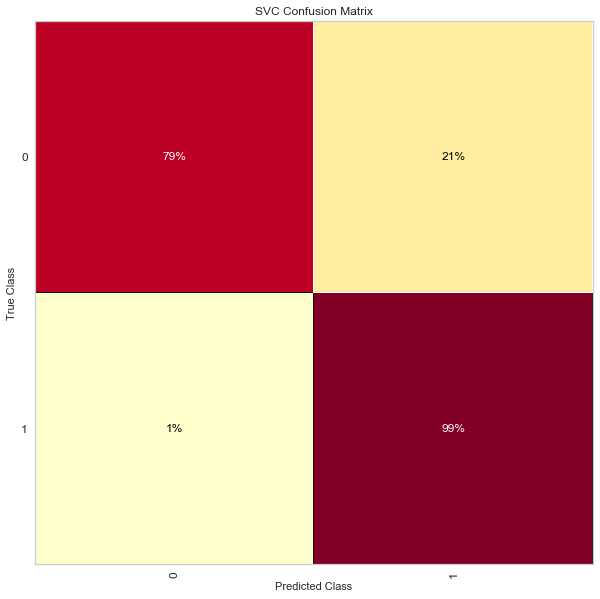

C:\Users\Oswaldo\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


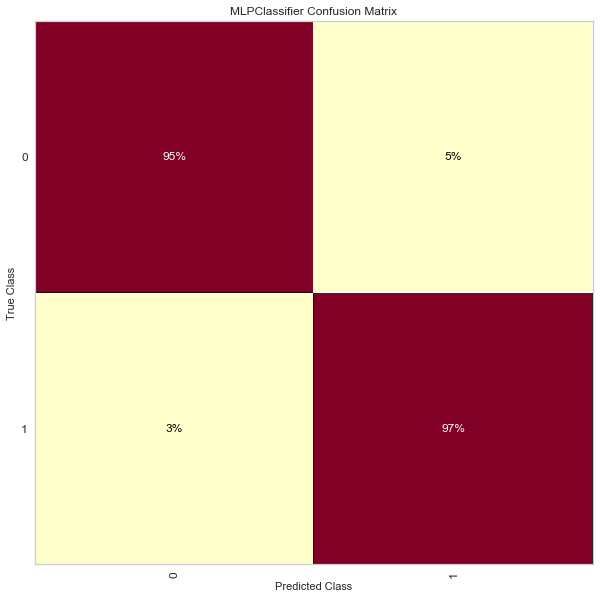

In [19]:
#deploy visualization
visualization =[CM_viz()]

In [20]:
#Deploy aggregate metrics  
classifier_metrics()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
accuracy_score: 0.958

------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy_score: 0.981

------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_wei